# LDA

### Referencias

- [Twitter Topic Modeling](https://towardsdatascience.com/twitter-topic-modeling-e0e3315b12e2)
- [Topic Modeling with Gensim (Python)](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#18dominanttopicineachsentence)
- [Reddit Machine Learning for Topic Analysis](https://machinelearninghd.com/reddit-machine-learning-sentiment-and-topic-analysis/)

In [1]:
import warnings
import pickle

import spacy, gensim
import gensim.corpora as corpora
import pandas as pd
import matplotlib.pyplot as plt

import pyLDAvis.gensim_models
from wordcloud import WordCloud


warnings.filterwarnings("ignore", category=DeprecationWarning)

np.random.seed(42)

%matplotlib inline

In [2]:
TEXT_FILE_READ = 'docs/preprocessing_reddit_data.csv'
TEXT_SAVE_FILE = 'docs/reddit_data_lda.csv'
FILENAME_PICKLE = "docs/tmpreddit.pickle"

In [3]:
with open(FILENAME_PICKLE, 'rb') as f:
    df = pickle.load(f)

In [4]:
# Create Dictionary
id2word = corpora.Dictionary(df['lemma_tokens'])

# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)

# Creating a corpus object
corpus = [id2word.doc2bow(d) for d in df['lemma_tokens']]


In [5]:
# Instantiating a Base LDA model
base_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                  id2word=id2word,
                                                  num_topics=120,
                                                  random_state=100,
                                                  chunksize=10000,
                                                  passes=10,
                                                  alpha='auto',
                                                  per_word_topics=True)

In [6]:
for index, topic in base_model.show_topics(num_topics=120, formatted=False, num_words= 30):
    print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))

Topic: 0 
Words: ['querer', 'rápido', 'aparte', 'él', 'barco', 'contrario', 'vs', 'demostrar', 'dar', 'habilidad', 'comun', 'garcha', 'aumento', 'ver', 'suelo', 'casero', 'revisar', 'choque', 'facha', 'ofelia', 'director', 'asesor', 'lamentable', 'oculto', 'sopa', 'controlado', 'basico', 'recital', 'activar', 'frutilla']
Topic: 1 
Words: ['decir', 'entender', 'jajaja', 'forro', 'él', 'patria', 'bala', 'año', 'borrar', 'crédito', 'activo', 'inutil', 'fumar', 'n', 'calentar', 'dar', 'donar', 'intendente', '😏', 'caramelo', 'cajar', 'cigarrillo', 'externo', 'corchazo', 'mortal', 'combinación', 'conducir', 'apurado', 'ver', 'estudiante']
Topic: 2 
Words: ['inflación', 'contar', 'mostrar', 'economía', 'jajaj', 'mier', 'puta_madre', 'votante', 'justicia', 'jajajajaja', 'entro', 'recuperar', 'tío', 'éxito', 'digno', 'él', 'peligro', 'ver', 'consumidor', 'nulo', 'contrato', 'método', 'gesto', 'broma', 'cariño', 'alegría', 'gente', 'vegano', 'ejército', 'vicio']
Topic: 3 
Words: ['va', 're', 'ju

In [8]:
# Visualize the topics
#pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim_models.prepare(base_model, corpus, id2word)
#vis


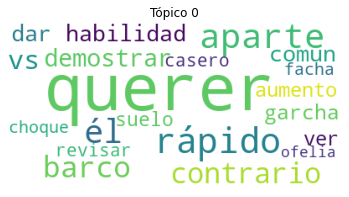

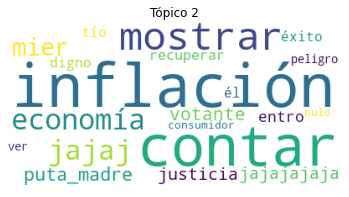

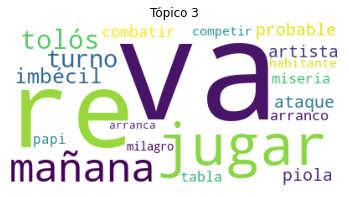

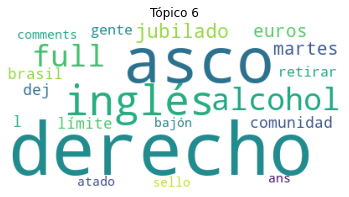

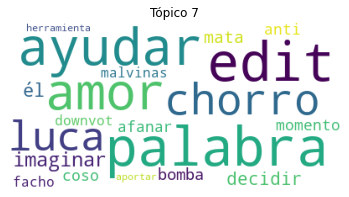

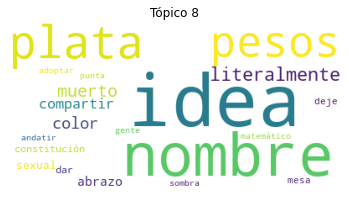

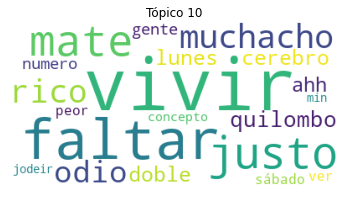

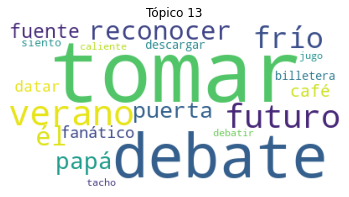

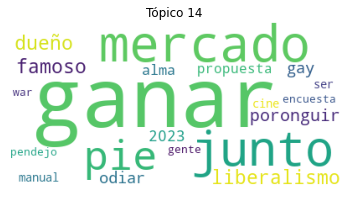

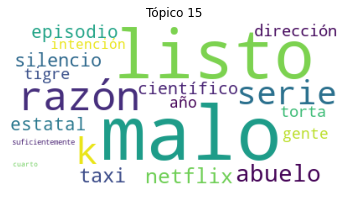

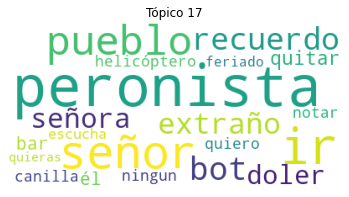

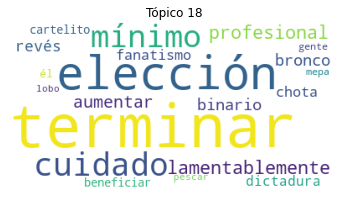

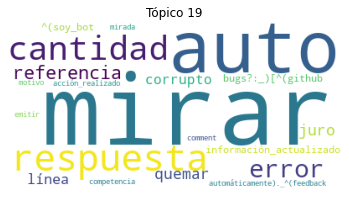

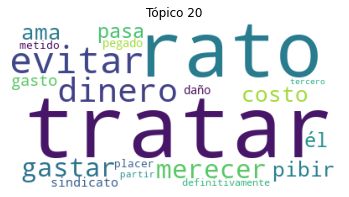

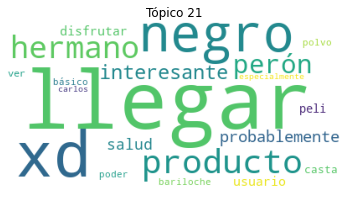

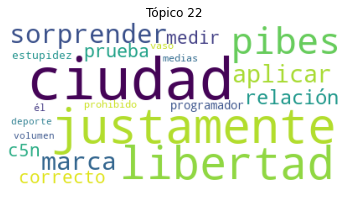

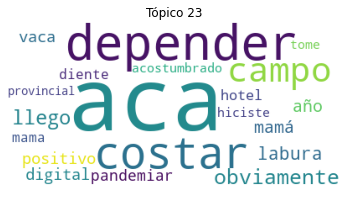

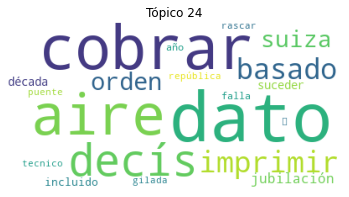

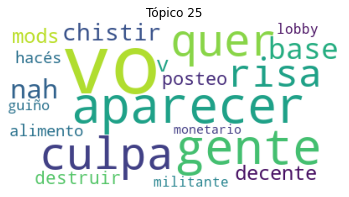

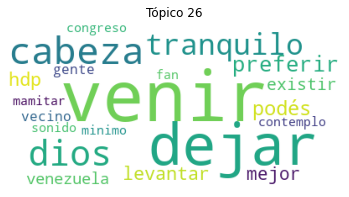

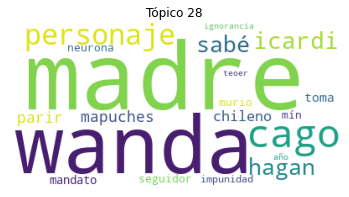

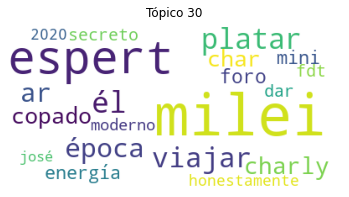

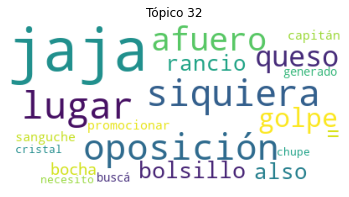

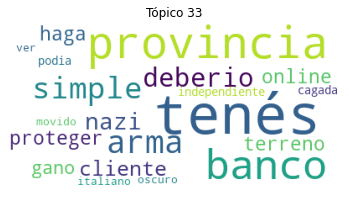

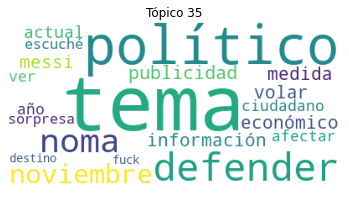

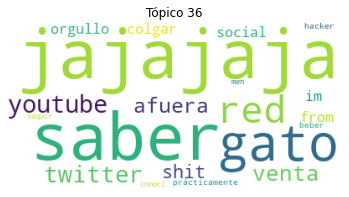

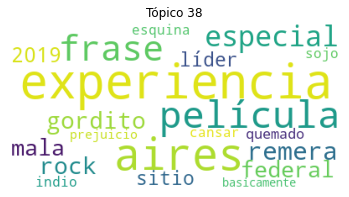

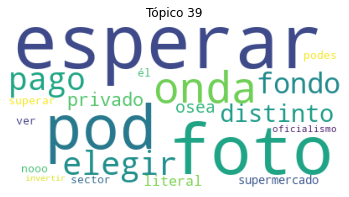

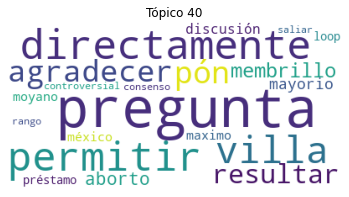

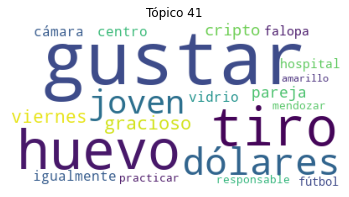

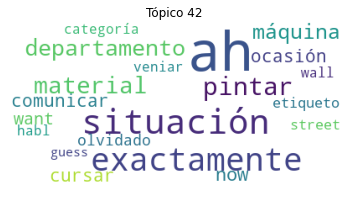

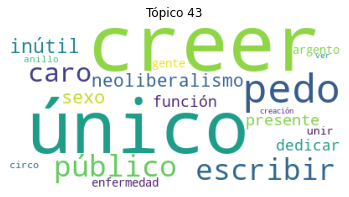

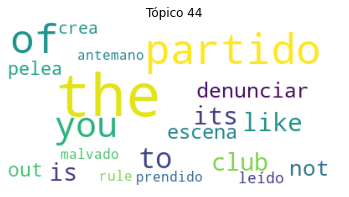

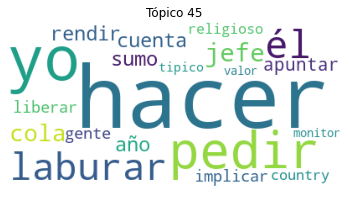

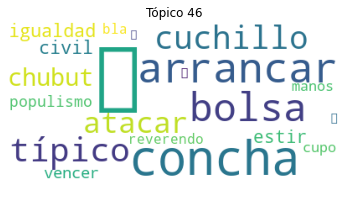

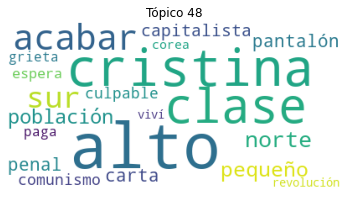

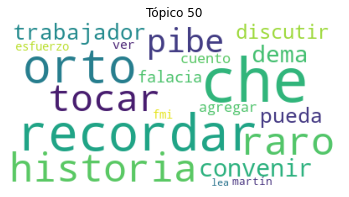

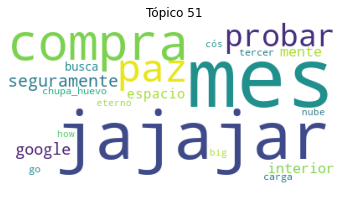

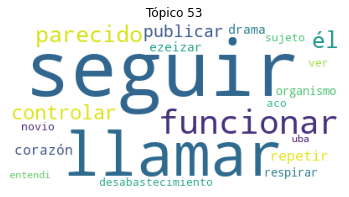

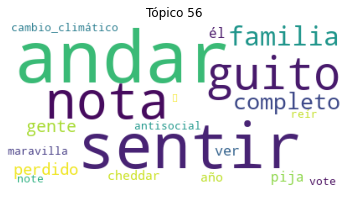

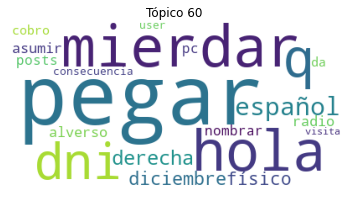

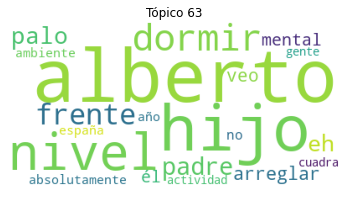

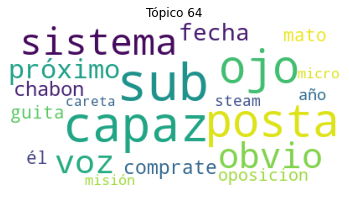

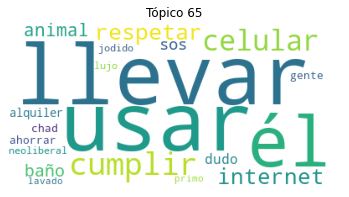

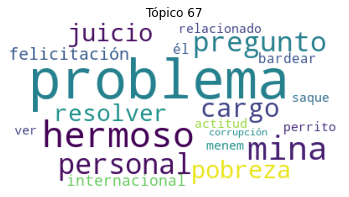

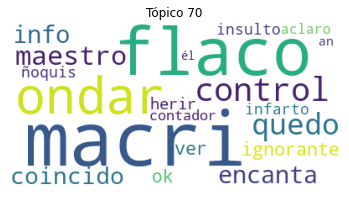

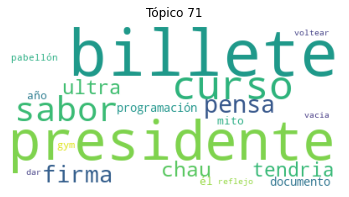

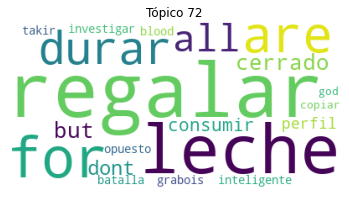

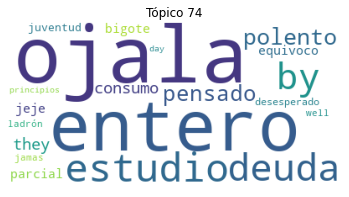

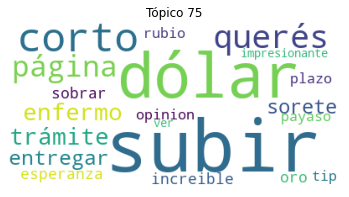

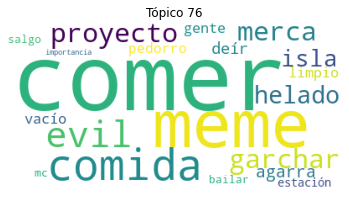

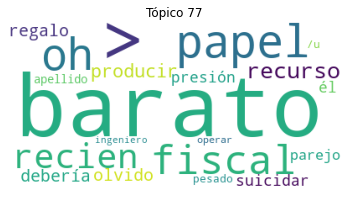

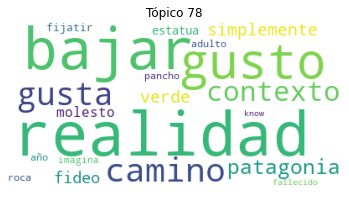

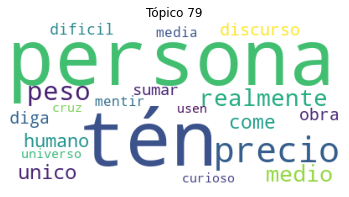

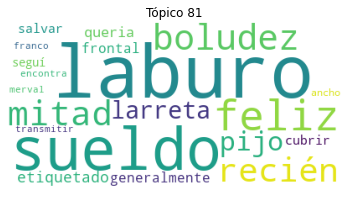

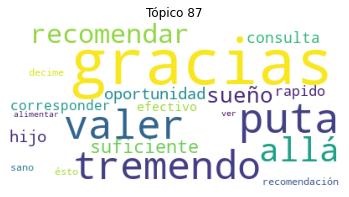

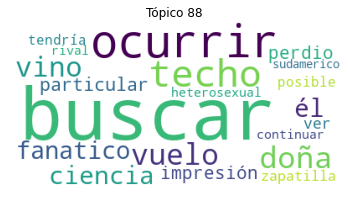

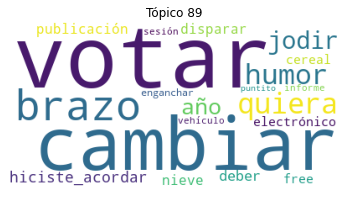

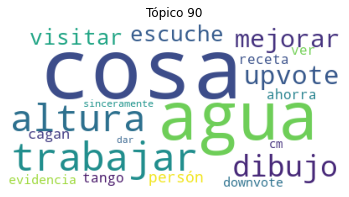

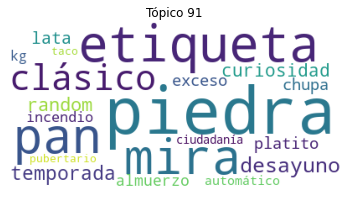

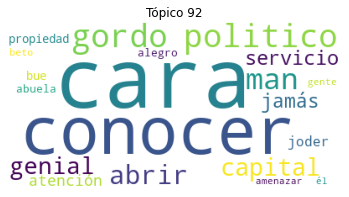

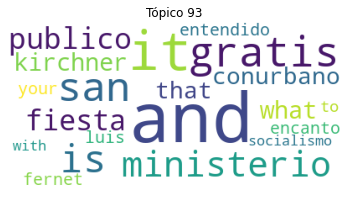

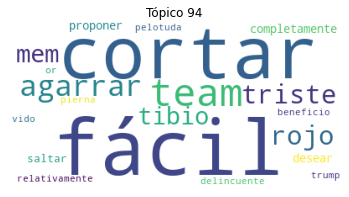

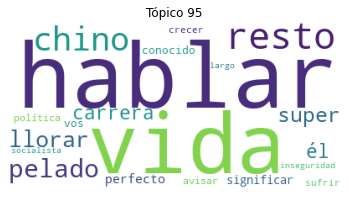

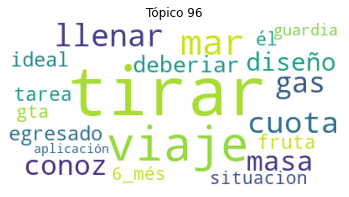

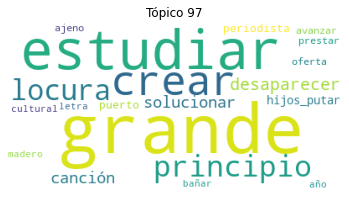

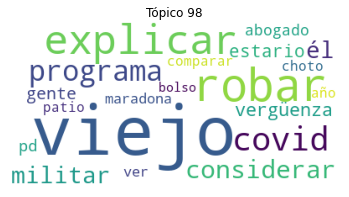

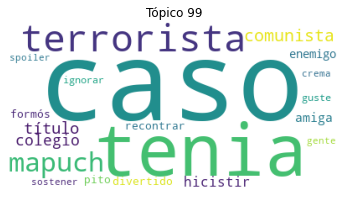

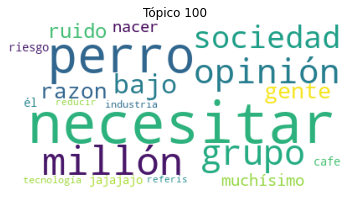

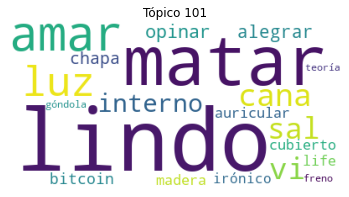

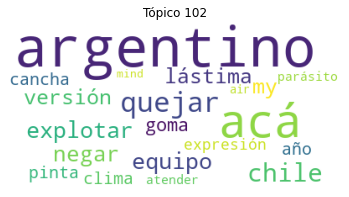

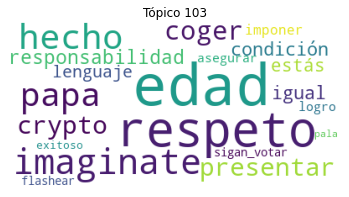

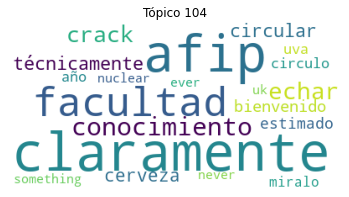

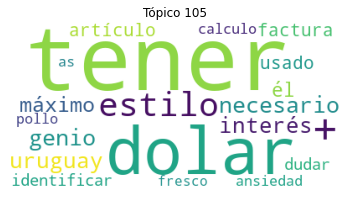

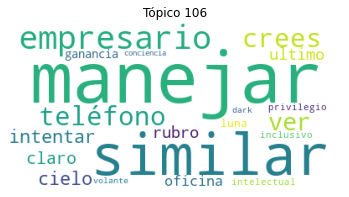

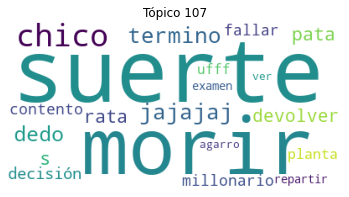

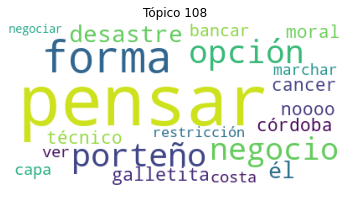

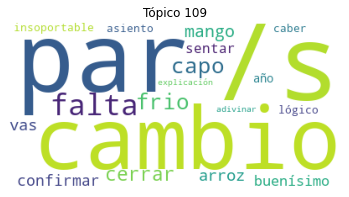

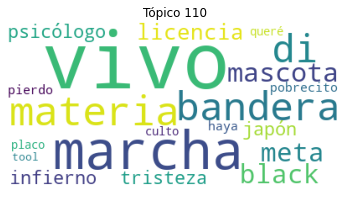

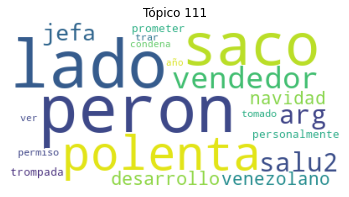

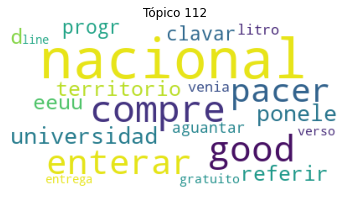

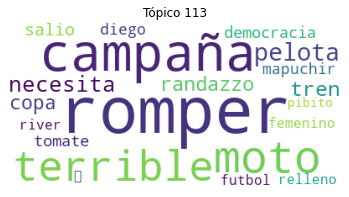

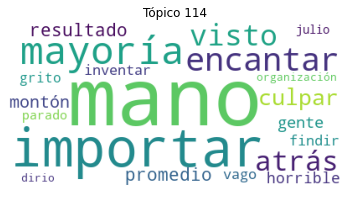

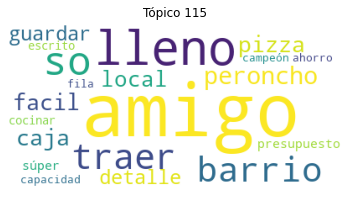

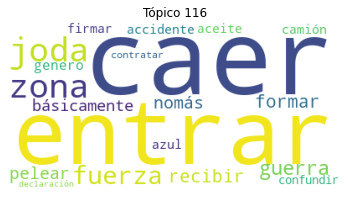

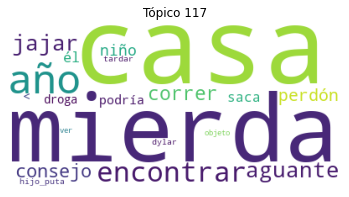

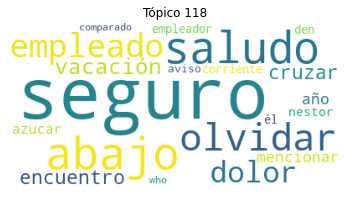

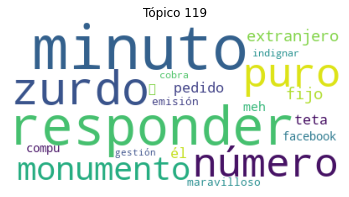

In [9]:
for index, topic in base_model.show_topics(num_topics=120, formatted=False, num_words= 30):
    plt.figure()
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1.0)
               .fit_words(dict(base_model.show_topic(index, 20))))
    plt.axis("off")
    plt.title("Tópico " + str(index))
    plt.show()

In [10]:

def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # row = sorted(row, key=lambda x: (x[1]), reverse=True) # old line
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0: # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
                #ent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4)]), ignore_index=True)
                #print(sent_topics_df)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    #sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution']

    # Add original text to the end of the output
    #contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, texts], axis=1)
    return(sent_topics_df)


In [11]:
reddit = pd.read_csv(TEXT_FILE_READ)
df_topic_sents_keywords = format_topics_sentences(ldamodel=base_model, corpus=corpus, texts=reddit)

In [12]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
#df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

index  Dominant_Topic  Perc_Contribution  \
0      0            65.0             0.1947   
1      1            79.0             0.3178   
2      2            90.0             0.3874   
3      3            86.0             0.2217   
4      4            84.0             0.1102   
5      5            90.0             0.3610   
6      6            79.0             0.2419   
7      7           114.0             0.1948   
8      8            69.0             0.3290   
9      9            52.0             0.3170   

                                      Topic_Keywords  score       id  \
0  llevar, usar, él, cumplir, celular, respetar, ...      1  hfw14mt   
1  persona, tén, precio, peso, realmente, medio, ...      1  hfw41eh   
2  cosa, agua, trabajar, altura, dibujo, upvote, ...      1  hfw1ao2   
3  argentina, mundo, boca, pelo, parar, ️, secund...      1  hfw3jof   
4  quedar, video, carajo, normal, algun, sentido,...      1  hfw6v4i   
5  cosa, agua, trabajar, altura, dibujo, upvote, ...      1  hfw26iv   
6  persona, tén, precio, peso, realmente, medio, ...      1  hfw2gof   
7  mano, importar, mayoría, encantar, visto, atrá...      1  hfw5s13   
8  mierdo, caño, basura, imposible, gente, mentir...      1  hfw3air   
9  pobre, gana, totalmente, imagino, compro, lpm,...      7  hfvxa6w   

        flair  comms_num                                               body  \
0  Discusion🧐          1  todo para decir que tapaste el baño. tira un b...   
1  Discusion🧐          0  sopapa primero master, si hay tapón te vas a t...   
2  Discusion🧐          0  Usas la sopapa, o tiras agua caliente con un b...   
3  Discusion🧐          2  Lo que he probado que siempre me dio resultado...   
4  Discusion🧐          0  Estas cobrando por dar mantenimiento y no sabe...   
5  Discusion🧐          0  Si tenes algo con punta, metelo y hace un poco...   
6  Discusion🧐          1  Con una manguera para regar el jardín, si tene...   
7  Discusion🧐          0  despues regas el jardin y se lava sola, solo q...   
8  Discusion🧐          0  La respuesta real es que se venden unos caños ...   
9  Discusion🧐          3                   Mi alfajor favorito es el Havana   

  comment_parent_id  ... Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10  \
0            q44kw3  ...        NaN        NaN        NaN         NaN   
1           hfw14mt  ...        NaN        NaN        NaN         NaN   
2            q44kw3  ...        NaN        NaN        NaN         NaN   
3            q44kw3  ...        NaN        NaN        NaN         NaN   
4            q44kw3  ...        NaN        NaN        NaN         NaN   
5            q44kw3  ...        NaN        NaN        NaN         NaN   
6            q44kw3  ...        NaN        NaN        NaN         NaN   
7           hfw2gof  ...        NaN        NaN        NaN         NaN   
8            q44kw3  ...        NaN        NaN        NaN         NaN   
9            q443eo  ...        NaN        NaN        NaN         NaN   

  Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14  \
0         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN   
5         NaN         NaN         NaN         NaN   
6         NaN         NaN         NaN         NaN   
7         NaN         NaN         NaN         NaN   
8         NaN         NaN         NaN         NaN   
9         NaN         NaN         NaN         NaN   

                                        lemma_tokens  \
0     ['tapastir', 'baño', 'tirar', 'balde', 'aguo']   
1  ['sopapa', 'master', 'tapón', 'va', 'teñir', '...   
2    ['sopapo', 'tira', 'agua', 'caliente', 'balde']   
3  ['probado', 'resultado', 'sellar', 'boca', 'in...   
4  ['cobrar', 'mantenimiento', 'carajo', 'kjjjjjj...   
5  ['tén', 'punto', 'metelo', 'fuerza', 'romper',...   
6        ['regar', 'jardín', 'tén', 'pod',

In [11]:
df_dominant_topic.to_csv(TEXT_SAVE_FILE, index=False)

In [18]:
test_path = 'docs/test/lda_comments_per_cluster/'

for index, topic in base_model.show_topics(num_topics=120, formatted=False, num_words= 30):
    df_dominant_topic[(df_dominant_topic["Dominant_Topic"] == index)][['flair', 'body']].to_csv(test_path + str(index) + '.csv')
#for i in range(n_clusters):
#    reddit[(reddit["cluster"] == i)][['flair', 'body']].to_csv(test_path + str(i) + '.csv')